In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df = pd.read_csv(r'C:\Users\User\Downloads\Visadataset.csv')
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


***BOX PLOT**

- box plot is used to detetect outliers
- box plot has min q1, q2, q3 and max value
- inside box plot red line represents median which is 50 percentile data

**Outlier**
- Outlier is very very huge or very very low observation

**Mild Outliers**
- q1 - 1.5*IQR and q3 + 1.5*IQR

**Strong Outliers**
- q1 - 3*IQR and q3 + 3*IQR

**IQR**
- IQR = Q3-Q1

- q1:25P
- q2:50P
- q3:75P

In [7]:
          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

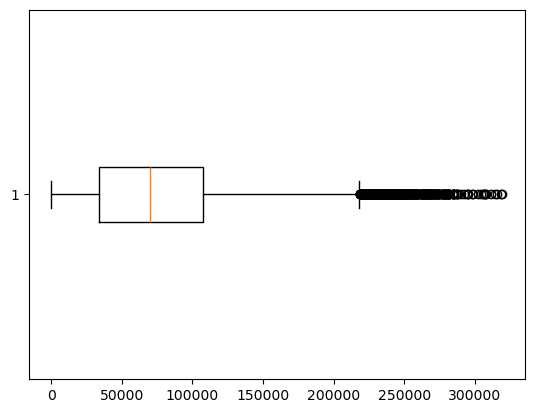

In [8]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

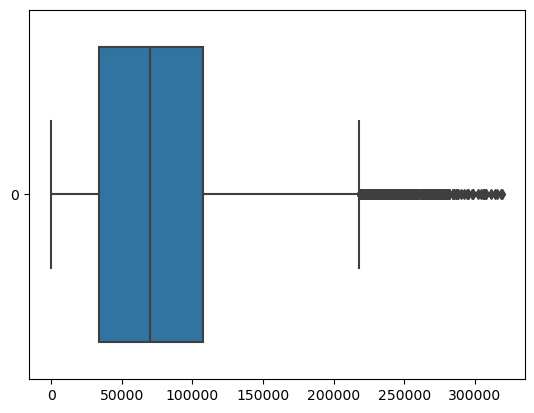

In [9]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')
plt.show()

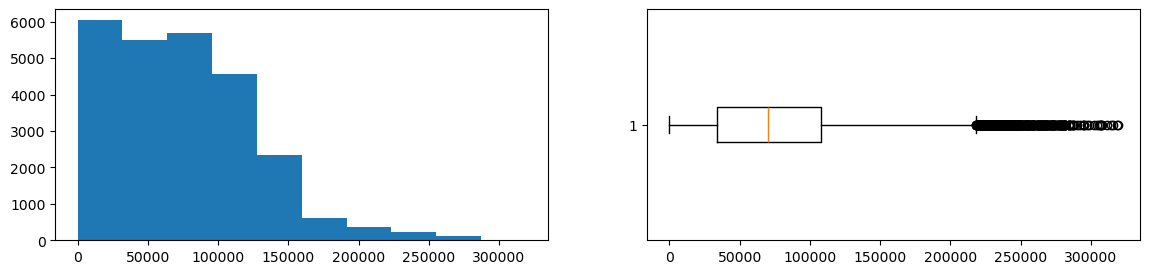

In [10]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)

plt.show()

**Finding the outliers**

- Outliers are available less than q1-1.5IQR
- Outliers are available less than q3+1.5IQR
- Step1:
- 
      - Calculate q1
      - Calculate q2
      - Calculate IQR: Q3-Q1

- Step2:
- 
      - LB = q1-1.5*IQR
      - UB = q3+1.5*IQR
  
- Step3:
  
      - con1=visa_df['prevailing_wage'] < LB
      - con2 =visa_df['prevailing_wage'] >UB
      - apply OR operation on con1 and con2, and get the outliers data

**Outliers Data**

In [11]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR
con1=visa_df['prevailing_wage'] < LB
con2 =visa_df['prevailing_wage'] > UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

**Non Outliers Data**

In [12]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=q3-q1
LB = q1-1.5*IQR
UB = q3+1.5*IQR
con1=visa_df['prevailing_wage'] > LB
con2 =visa_df['prevailing_wage'] < UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

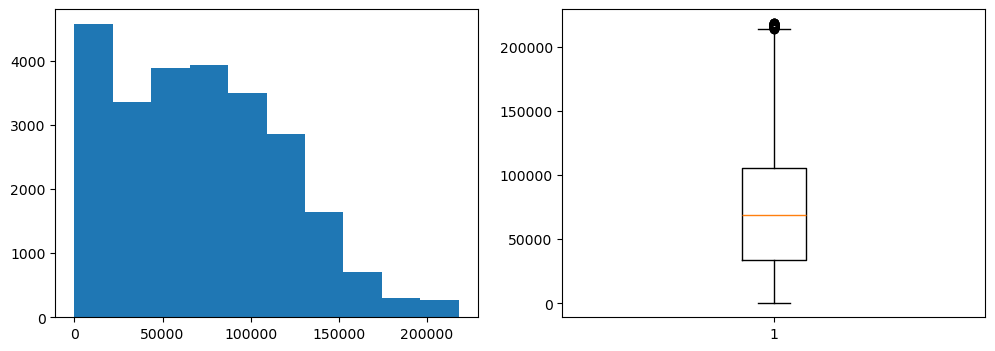

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**Comparing Total data with non outliers data**

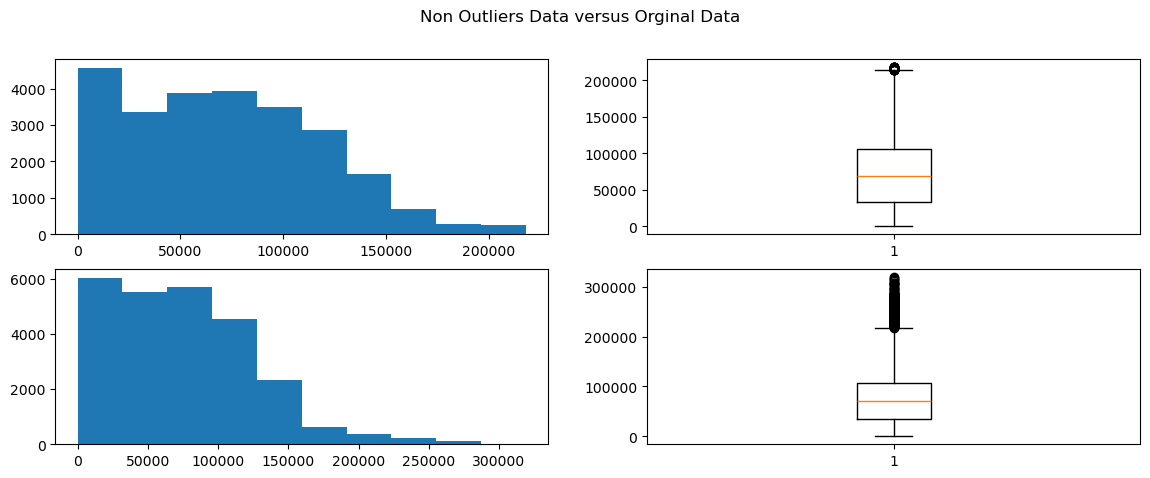

In [14]:
plt.figure(figsize=(14,5))

plt.suptitle('Non Outliers Data versus Orginal Data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])

plt.show()

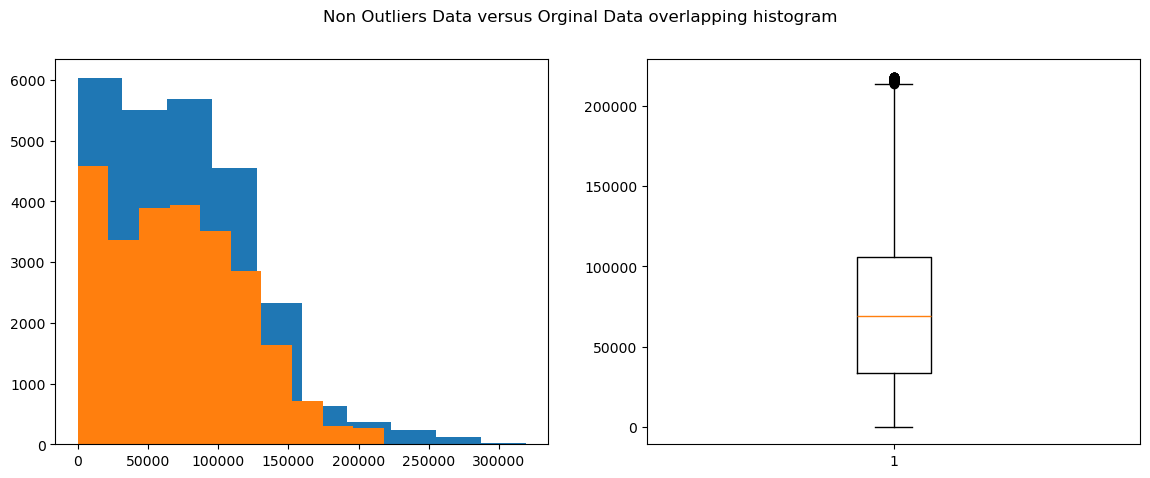

In [15]:
plt.figure(figsize=(14,5))

plt.suptitle('Non Outliers Data versus Orginal Data overlapping histogram')

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])

#plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
#plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])

plt.show()

**How to deal the outliers**

**Method 1: Drop the outliers**

    - Dropping the outliers is not a good idea
    - when you drop the outliers , data will be lost
    - for example here we are dropping 427 rows, i.e 1.7 percent of data is lost

**Method 2 : Fill with ***median*** value**

    - We already know that outliers does not affect median
    - So fill outliers with median value

**Method 3: Cap the values with Q1 and Q3**

     - all less than lower bound values, replace with Q1 or LB
     - all greater than upper bound values, replace with Q3 or UB

**Fill with median**

- create an empty list
- Iterate the visa_df['prevailing_wage'].values 
    - if each value is less than LB or greater than UB then append with median value or its own value

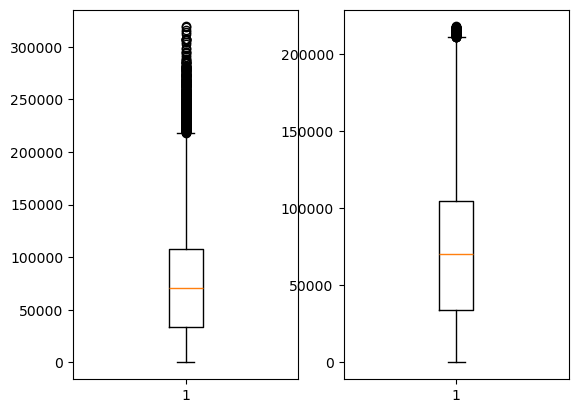

In [16]:
median_val = round(visa_df['prevailing_wage'].median(),2)
wages=[]
for value in visa_df['prevailing_wage'].values:
    if value < LB or value > UB:
        wages.append(median_val)
    else:
        wages.append(value)

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage']=wages

plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()



**np.where**

- np.where is used for binary condition
- It has 3 arguments
  
        - condition
      - value if condition is True
      - value if condition is False

In [17]:
d={"Subject":["DS","ML","CS"],
   "Marks":[100,150,20]}
df=pd.DataFrame(d)
df
# Marks column replace with 1 when value >100
# else same value
# Marks Marks
# 100 100
# 150 1
# 20 20


,Subject,Marks
0,DS,100
1,ML,150
2,CS,20


In [18]:
con=df['Marks']>100
l=np.where(con,1,df['Marks'])
#if the con is True then replace with 1 else if False then replace with df['Marks']
#df
l

array([100,   1,  20], dtype=int64)

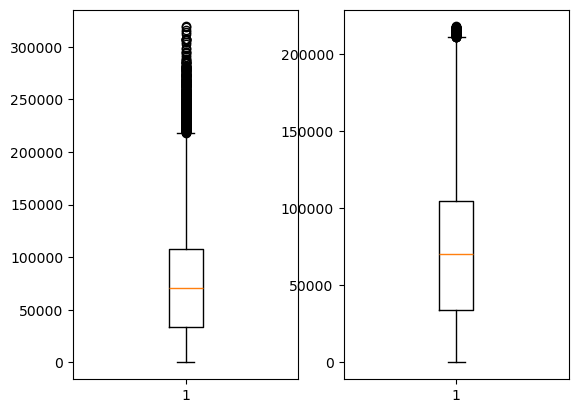

In [19]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1 | con2
median=visa_df['prevailing_wage'].median()
new_data=np.where(con,median,visa_df['prevailing_wage'])
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()